/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_29402/3475446284.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2_4['outcome'] = df_2_4['outcome'] + 1


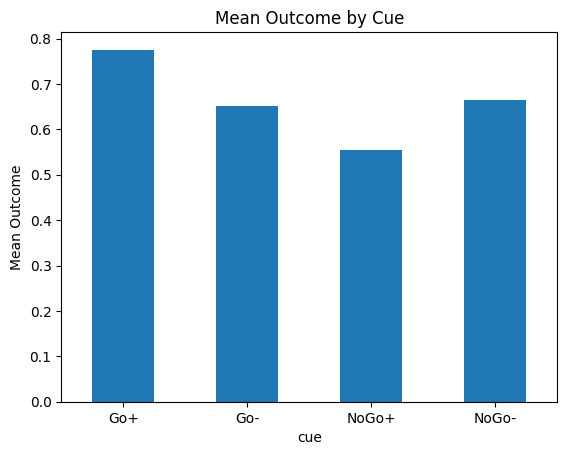

/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_29402/3475446284.py:70: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  q["Go+"][1] = 1
/var/folders/hw/t8w_f3wd78n4gvj00fq4_9s40000gn/T/ipykernel_29402/3475446284.py:73: FutureWarning

In [9]:
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



# %%

#df = pd.read_csv('/Users/lucyk/Library/Mobile Documents/com~apple~CloudDocs/Uni 2/MASTER/neural modeling/coursework/3/gen_data.csv', index_col=0)
df = pd.read_csv('/Users/lucyk/Library/Mobile Documents/com~apple~CloudDocs/Uni 2/MASTER/neural modeling/coursework/assignment4/gen_data.csv', index_col=0)
cue_mapping = {1: 'Go+', 2: 'Go-', 3: 'NoGo+', 4: 'NoGo-'}  # Go+ = Go to win, Go- = go to avoid losing, NoGo+ = don't go to win, NoGo- = don't go to avoid losing

#print(df.head())

# exercise 1: plot the accuracy for each cue

# create a copy of df
df_copy = df.copy()

# split the dataframe by condition
df_1_3 = df_copy[df_copy['cue'].isin([1, 3])]
df_2_4 = df_copy[df_copy['cue'].isin([2, 4])]

# replace -1 by 0 and 0 by 1 for the 'outcome' in df_2_4
df_2_4['outcome'] = df_2_4['outcome'] + 1

# concatenate the two dataframes
df_concat = pd.concat([df_1_3, df_2_4])
# Go+ = Go to win, Go- = go to avoid losing, NoGo+ = don't go to win, NoGo- = don't go to avoid losing
cue_mapping = {1: 'Go+', 2: 'Go-', 3: 'NoGo+', 4: 'NoGo-'}  

# plot the mean outcome
df_concat.groupby('cue')['outcome'].mean().plot(kind='bar')
plt.xticks(np.arange(4), [cue_mapping[i] for i in range(1, 5)], rotation=0)
plt.ylabel('Mean Outcome')
plt.title('Mean Outcome by Cue')
plt.show()

# accuracy = [0, 0, 0, 0]
# for i in range(len(df)):
#     if df['cue'][i] == 1:
#             if df['outcome'][i] == 1:
#                 accuracy[0] += 1
#     if df['cue'][i] == 2:
#         if df['outcome'][i] == 0:
#             accuracy[1] += 1  
#     if df['cue'][i] == 3:
#         if df['outcome'][i] == 1:
#             accuracy[2] += 1
            
#     if df['cue'][i] == 4:
#         if df['outcome'][i] == 0:
#             accuracy[3] += 1

# accuracy[0] = accuracy[0]/df['cue'].value_counts()[1]
# accuracy[1] = accuracy[1]/df['cue'].value_counts()[2]
# accuracy[2] = accuracy[2]/df['cue'].value_counts()[3]
# accuracy[3] = accuracy[3]/df['cue'].value_counts()[4]

# print(accuracy)
    
# plt.bar(cue_mapping.values(), accuracy)
# plt.show()


# %%
q = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
q["Go+"][1] = 1
for i in range(1,len(df)):
    for cue in cue_mapping.values():
        q[cue][i] = q[cue][i-1]
        # print(q[cue][i])
q["Go+"][1] 

# %%
beta = 0.1
learning_rate = 0.1
# create a q and w dataframe which is initialized for all cues in cue-mapping having zeros and their length 
q = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
w = pd.DataFrame(0, index=np.arange(len(df)), columns=cue_mapping.values())
log_likelihood = 0

for i in range(1,len(df)):
    for cue in cue_mapping.values():
        q[cue][i] = q[cue][i-1] + learning_rate * (beta - q[cue][i-1])
        w[cue][i] = q[cue][i]  
        #log_likelihood[i] = np.log(softmax(w)[i])
    
#return log_likelihood




In [10]:
df

,cue,pressed,outcome,ID
0,1,1,1,0
1,1,1,1,0
2,2,0,-1,0
3,2,1,0,0
4,1,1,1,0
...,...,...,...,...
595,4,0,-1,9
596,3,0,1,9
597,2,1,0,9
598,4,1,-1,9


In [50]:
from scipy.special import softmax

# def model_1(parameters, data):
#    parameters = epsilon, beta, rho 



def model_1(data, parameters):

    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8)

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        # add bias to q_values_current
        # q_values_current = q_values_current + rho
        prob_action = softmax(q_values_current)[action]
        print(prob_action)
        log_likelihood += np.log(prob_action)
        print(np.log(prob_action))
    print(q)
    return -log_likelihood

initial_params = 0.5, 0.4, 0.5
 
model1_likelihood = model_1(df, initial_params)


0.5500519910564284
-0.5977424760297169
0.5768956926497029
-0.5500938041196701
0.44459017233646925
-0.810602382202716
0.5519758801750639
-0.5942509289947397
0.5901592446079729
-0.5273628723852664
0.5481713966175473
-0.6011672733854266
0.4525559415064437
-0.7928438958448734
0.596743423105283
-0.5162680350132349
0.4769455625326111
-0.7403529192760898
0.5736215550694463
-0.5557854118298294
0.5865665011880055
-0.5334692308065581
0.46719299305684575
-0.7610128453185028
0.5929955520534502
-0.5225683807655774
0.5512096721506125
-0.5956400119935868
0.5502570248807087
-0.5973697919497291
0.5280659892695084
-0.6385340234080855
0.5493971444089499
-0.5989337029883667
0.4394814451537022
-0.8221597808284271
0.45638744085865074
-0.7844131792110277
0.5489670931682524
-0.5997167788532948
0.5164211966644143
-0.66083257386442
0.5164424189460768
-0.660791479800606
0.46962907881182386
-0.7558120898729682
0.43188595131089524
-0.8395937271877323
0.5579519372178937
-0.5834824543286853
0.5487520400722281
-0.600

In [51]:
model1_likelihood

3713.4943984702104

In [13]:
def model_2(data, parameters, p_rew, p_pun):

    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) # 8 q-values for 4 cues and 2 actions each

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        if reward == 1:
            beta = p_rew
        elif reward == 0:
            beta = 0
        elif reward == -1:
            beta = p_pun
            
        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    print(q)
    return -log_likelihood

In [14]:
p_rew = 0.2
p_pun = 0.8

model2_log_likelihood = model_2(df, initial_params, p_rew, p_pun) 
print(model2_log_likelihood)

[ 3.93682718e-04  1.99840152e-01 -7.46874225e-01 -2.25025011e-01
  1.84330726e-01  5.17090816e-02 -4.31250000e-01 -7.97655487e-01]
3672.9135982635958


In [17]:
def model_3(data, parameters, learning_rate_rew, learning_rate_pun, learning_rate_obm):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) # 8 q-values for 4 cues and 2 actions each

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        if reward == 1:
            epsilon = learning_rate_rew
        elif reward == 0:
            epsilon = learning_rate_obm
        elif reward == -1:
            epsilon = learning_rate_pun

        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [20]:
p_rew = 0.2
p_pun = 0.8
learning_rate_rew = 0.2
learning_rate_pun = 0.8
learning_rate_obm = 0.5

model3_log_likelihood = model_3(df, initial_params, learning_rate_rew, learning_rate_pun, learning_rate_obm) 
print(model3_log_likelihood)

3678.690501289688


In [21]:
def model_4(data, parameters, bias_rew, bias_pun):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) # 8 q-values for 4 cues and 2 actions each

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        if cue == 0:
            q_values_current[1] += bias_rew
        elif cue == 1:
            q_values_current[1] += bias_pun
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [23]:
p_rew = 0.2
p_pun = 0.8
learning_rate_rew = 0.2
learning_rate_pun = 0.8
learning_rate_obm = 0.5
bias_rew = 0.2
bias_pun = 0.8

model4_log_likelihood = model_4(df, initial_params, bias_rew, bias_pun) 
print(model4_log_likelihood)

3621.0107440402817


In [ ]:
def model_5(data, parameters, p_rew, p_pun, bias_rew, bias_pun):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) 

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        if reward == 1:
            beta = p_rew
        elif reward == 0:
            beta = 0
        elif reward == -1:
            beta = p_pun

        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        if cue == 0:
            q_values_current[1] += bias_rew
        elif cue == 1:
            q_values_current[1] += bias_pun
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [25]:
def model_6(data, parameters, p_app_rew, p_app_pun, p_wth_rew, p_wth_pun, bias_rew, bias_pun):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) 

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]

        if reward == 0:
            beta = 0
        elif reward == 1 & action == 1:
            beta = p_app_rew
        elif reward == -1 & action == 1:
            beta = p_app_pun
        elif reward == 1 & action == 0:
            beta = p_wth_rew
        elif reward == -1 & action == 0:
            beta = p_wth_pun

        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        if cue == 0:
            q_values_current[1] += bias_rew
        elif cue == 1:
            q_values_current[1] += bias_pun
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [26]:
def model_7(data, parameters, learning_rate_rew, learning_rate_pun, learning_rate_obm, p_rew, p_pun, bias_rew, bias_pun):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) 

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        if reward == 1:
            beta = p_rew
        elif reward == 0:
            beta = 0
        elif reward == -1:
            beta = p_pun

        if reward == 1:
            epsilon = learning_rate_rew
        elif reward == 0:
            epsilon = learning_rate_obm
        elif reward == -1:
            epsilon = learning_rate_pun


        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        if cue == 0:
            q_values_current[1] += bias_rew
        elif cue == 1:
            q_values_current[1] += bias_pun
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [ ]:
def model_8(data, parameters, learning_rate_rew, learning_rate_pun, learning_rate_obm, p_rew, p_pun, bias_rew, bias_pun, p):
    epsilon, beta, rho = parameters
    log_likelihood = 0
    q = np.zeros(8) 

    for i in range(len(data)):
        cue, action, reward = data.iloc[i][:3]
        if reward == 1:
            beta = p_rew
        elif reward == 0:
            beta = 0
        elif reward == -1:
            beta = p_pun

        if reward == 1:
            epsilon = learning_rate_rew
        elif reward == 0:
            epsilon = learning_rate_obm
        elif reward == -1:
            epsilon = learning_rate_pun

        q_index = (cue-1) * 2 + action
        q[q_index] = q[q_index] + epsilon * (beta*reward - q[q_index])
        #print(q[q_index])
        q_values_current = q[(cue-1) * 2 : (cue-1) * 2 + 2]
        if cue == 0:
            q_values_current[1] += bias_rew
        elif cue == 1:
            q_values_current[1] += bias_pun
        
        if np.max(q_values_current) > 0:
            q_values_current[1] += p
        else:
            q_values_current[0] += p
        prob_action = softmax(q_values_current)[action]
        log_likelihood += np.log(prob_action)
    return -log_likelihood

In [24]:

method = 'Nelder-Mead'  # this optimization should work for the given data, but feel free to try others as well, they might be faster

# define a function to compute the BIC
def BIC(data, log_likelihood, k):
    BIC = 0
    BIC = k*np.log(len(data)) - 2*-log_likelihood(data)
    return BIC

model_params = {}

# loop over all models

for i in range(1, 8):
    learner_name = f"model_{i}" 
    learner = globals()[learner_name] 

    if learner_name == 'model_1':
        initial_params = 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10)]
    elif learner_name == 'model_2':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1)]
    elif learner_name == 'model_3':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1), (0, 1)]
    elif learner_name == 'model_4':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1)]
    elif learner_name == 'model_5':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1), (0, 1), (0, 1)]
    elif learner_name == 'model_6':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]
    elif learner_name == 'model_7':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0,1)]
    elif learner_name == 'model_8':
        initial_params = 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5
        bounds = [(0, 1), (0, None), (0, 10), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0,1), (0,1)]

    

    for j, learner in enumerate([learner]):

        for k, subject in enumerate(np.unique(df.ID)):
            subject_data = df[df[subject]] # subset data to one subject
            subject_data = subject_data.reset_index(drop=True)  

            if j == 0:

                # define yourself a loss for the current model
                def loss(params):
                    return -learner(subject_data, *params).sum()
                
                # optimize the above models with initial guessed for parameters and bounds of parameters

                res = minimize(loss, initial_params, bounds, method=method)

                # save the optimized log-likelihhod
                log_likelihood = -res.fun

                # save the fitted parameters
                params = res.x
                print(params)

                model_params[(i, k)] = params

    # compute BIC
    bic = BIC(subject_data, log_likelihood, len(params))



    



KeyError: 0

In [ ]:
# plot learning rates of the last model
models = ['model_1', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6', 'model_7']
plt.plot(models, model_params.values())
plt.show()
